# API RED ELECTRICA DE ESPAÑA - INTERCAMBIO DE ENERGIA

Vamos a obtener datos de la web de Red Eléctrica de España (https://www.ree.es/es) usando su API y siguiendo la información de la siguiente documentación (https://www.ree.es/es/apidatos).

Los datos a manejar en el presente Notebook serán los relativos aL intercambio entre España y los paises vecinos.

In [3]:
import numpy as np
import pandas as pd

from datetime import datetime

import json
from pandas import Timestamp

import requests
from pprint import pprint

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import folium

# EXTRACCIÓN

## Automatización de la extracción

Para la categoría de intercambio de la API se decide generar una función que extrae la energia electric intercambiarada los ultimos 12 años (máxima disponibilidad de datos). Estraemos datos mensuales diferenciando entre importación y exportación de cada pais.

In [4]:
def intercambio(category, widgets):
    search_url = "https://apidatos.ree.es/es/datos/"
    time_trunc="month"    
    category == "intercambios"
    Data_gen= {}
    Francia_imp=[]
    Francia_exp=[]
    Portugal_imp=[]
    Portugal_exp=[]
    Marruecos_imp=[]
    Marruecos_exp=[]
    Andorra_imp=[]
    Andorra_exp=[]
    Fecha=[]
    for x in range(2012,2024,2):
        start_date = f"{x}-05-02T00:00"
        end_date= f"{x+2}-05-01T23:59"
        query = f"start_date={start_date}&end_date={end_date}&time_trunc={time_trunc}"
        endpoint = f"{search_url}{category}/{widgets}?{query}"
        print(f"Endpoint: {endpoint}")
        response = requests.get(url = endpoint)
        print(f"response: {response.status_code}")
        data = response.json()
        Data_gen[f"{x}"]=data
            
    for i in Data_gen.keys():
        for w in Data_gen[i]["included"][0]["attributes"]["content"][0]["attributes"]["values"]:
                                Fecha.append(w["datetime"]) 
                
        for g in range(len(Data_gen[i]["included"])):

            if g==0:

                for k in range(2): 
                    if k==0:
                        for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Francia_exp.append(j["value"])
                    else:
                        for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Francia_imp.append(j["value"])

            elif g==1:

                for k in range(2): 
                    if k==0:
                        for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Portugal_exp.append(j["value"])
                    else:
                            for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Portugal_imp.append(j["value"])

            elif g==2:

                for k in range(2): 
                    if k==0:
                        for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Marruecos_exp.append(j["value"])
                    else:
                            for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Marruecos_imp.append(j["value"])

            elif g==3:

                for k in range(2): 
                    if k==0:
                        for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Andorra_exp.append(j["value"])
                    else:
                            for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Andorra_imp.append(j["value"])
         
    DF=pd.DataFrame({  "Fecha": Fecha,
                       "Importacion Francia": Francia_imp,
                       "Exportacion Francia": Francia_exp,
                       "Importacion Portugal": Portugal_imp,
                       "Exportacion Portugal": Portugal_exp,
                       "Importacion Marruecos": Marruecos_imp,
                       "Exportacion Marruecos": Marruecos_exp,
                       "Importacion Andorra": Andorra_imp,
                       "Exportacion Andorra": Andorra_exp})
    
       
    return DF

In [67]:
df_gen_3=intercambio("intercambios","todas-fronteras-fisicos")

Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2012-05-02T00:00&end_date=2014-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2014-05-02T00:00&end_date=2016-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2016-05-02T00:00&end_date=2018-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2018-05-02T00:00&end_date=2020-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2020-05-02T00:00&end_date=2022-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2022-05-02T00:00&end_date=2024-05-01T23:59&time_trunc=month
response: 200


In [68]:
df_gen_3

,Fecha,Importacion Francia,Exportacion Francia,Importacion Portugal,Exportacion Portugal,Importacion Marruecos,Exportacion Marruecos,Importacion Andorra,Exportacion Andorra
0,2012-05-01T00:00:00.000+02:00,447064.570,-213033.611,229832.204,-938561.572,114.80,-419670.60,0.26,-10975.35
1,2012-06-01T00:00:00.000+02:00,576567.600,-99903.189,258228.549,-940756.552,44.10,-409672.30,0.36,-9837.92
2,2012-07-01T00:00:00.000+02:00,597233.510,-100171.349,174652.981,-831043.878,0.00,-470131.90,0.00,-64.82
3,2012-08-01T00:00:00.000+02:00,489400.041,-154849.168,268423.731,-725316.823,0.50,-509035.00,0.00,-14833.03
4,2012-09-01T00:00:00.000+02:00,267397.124,-197847.201,220995.196,-838708.653,0.05,-482004.97,0.02,-17134.17
...,...,...,...,...,...,...,...,...,...
132,2022-12-01T00:00:00.000+01:00,319330.279,-1781757.198,938641.159,-403595.915,30888.20,-180855.30,0.00,-39880.17
133,2023-01-01T00:00:00.000+01:00,315199.649,-1252101.073,812211.152,-623876.920,19637.70,-151329.60,0.00,-42454.13
134,2023-02-01T00:00:00.000+01:00,344673.793,-937173.160,570791.150,-692816.850,26980.60,-214092.90,0.00,-21205.52
135,2023-03-01T00:00:00.000+01:00,206570.516,-1369903.338,136381.920,-1423083.207,26559.60,-160263.50,1.86,-23109.71


## Transformación

Se pasa la energía Intercambiada de MWh a GWh

In [71]:
# Pasamos la energía Intercambiada de Mw/h a Gw/h dividiendo entre 1000.
for j in range(1,9): 
    df_gen_3[f"{df_gen_3.columns[j]}"]=df_gen_3[f"{df_gen_3.columns[j]}"].apply(lambda x : round(x/1000,2))   

Obtenemos la fecha en string para subirla a Airtable

In [78]:
df_gen_3.iloc[:,0]=df_gen_3.iloc[:,0].apply(lambda x : x[0:10])

In [79]:
df_gen_3

,Fecha,Importacion Francia,Exportacion Francia,Importacion Portugal,Exportacion Portugal,Importacion Marruecos,Exportacion Marruecos,Importacion Andorra,Exportacion Andorra
0,2012-05-01,447.06,-213.03,229.83,-938.56,0.11,-419.67,0.0,-10.98
1,2012-06-01,576.57,-99.90,258.23,-940.76,0.04,-409.67,0.0,-9.84
2,2012-07-01,597.23,-100.17,174.65,-831.04,0.00,-470.13,0.0,-0.06
3,2012-08-01,489.40,-154.85,268.42,-725.32,0.00,-509.04,0.0,-14.83
4,2012-09-01,267.40,-197.85,221.00,-838.71,0.00,-482.00,0.0,-17.13
...,...,...,...,...,...,...,...,...,...
132,2022-12-01,319.33,-1781.76,938.64,-403.60,30.89,-180.86,0.0,-39.88
133,2023-01-01,315.20,-1252.10,812.21,-623.88,19.64,-151.33,0.0,-42.45
134,2023-02-01,344.67,-937.17,570.79,-692.82,26.98,-214.09,0.0,-21.21
135,2023-03-01,206.57,-1369.90,136.38,-1423.08,26.56,-160.26,0.0,-23.11


## CARGA DE DATOS

Cargadmos los datos en la nube, en este caso airtable.

#### Authentication - Tokens

In [82]:
API_KEY = "keyl2KiWpZ5VUmaEB" # Usuario # Actual Aitor

BASE_ID = "appm1SAwvclOOO6gH" # Base: Tabla API

TABLE_ID = "tbl3rMzuEOr4Yzcuh" # Tabla: datos_1

airtable_base_url = "https://api.airtable.com/v0"

In [83]:
# Headers
headers = {"Authorization" : f"Bearer {API_KEY}",
           "Content-Type"  : "application/json"}

pprint(headers)

{'Authorization': 'Bearer keyl2KiWpZ5VUmaEB',
 'Content-Type': 'application/json'}


#### Cargar datos a Airtable


In [84]:
# Create Records

# Endpoint
endpoint = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID}"

print(endpoint)

https://api.airtable.com/v0/appm1SAwvclOOO6gH/tbl3rMzuEOr4Yzcuh


In [85]:
datos_json = [{"fields" : df_gen_3.iloc[i, :].to_dict()} for i in range(df_gen_3.shape[0])]

pprint(datos_json)

[{'fields': {'Exportacion Andorra': -10.98,
             'Exportacion Francia': -213.03,
             'Exportacion Marruecos': -419.67,
             'Exportacion Portugal': -938.56,
             'Fecha': '2012-05-01',
             'Importacion Andorra': 0.0,
             'Importacion Francia': 447.06,
             'Importacion Marruecos': 0.11,
             'Importacion Portugal': 229.83}},
 {'fields': {'Exportacion Andorra': -9.84,
             'Exportacion Francia': -99.9,
             'Exportacion Marruecos': -409.67,
             'Exportacion Portugal': -940.76,
             'Fecha': '2012-06-01',
             'Importacion Andorra': 0.0,
             'Importacion Francia': 576.57,
             'Importacion Marruecos': 0.04,
             'Importacion Portugal': 258.23}},
 {'fields': {'Exportacion Andorra': -0.06,
             'Exportacion Francia': -100.17,
             'Exportacion Marruecos': -470.13,
             'Exportacion Portugal': -831.04,
             'Fecha': '2012-07-01'

 {'fields': {'Exportacion Andorra': -26.45,
             'Exportacion Francia': -428.7,
             'Exportacion Marruecos': -259.56,
             'Exportacion Portugal': -615.37,
             'Fecha': '2018-10-01',
             'Importacion Andorra': 0.0,
             'Importacion Francia': 668.79,
             'Importacion Marruecos': 16.19,
             'Importacion Portugal': 462.62}},
 {'fields': {'Exportacion Andorra': -30.55,
             'Exportacion Francia': -711.52,
             'Exportacion Marruecos': -87.55,
             'Exportacion Portugal': -511.43,
             'Fecha': '2018-11-01',
             'Importacion Andorra': 0.0,
             'Importacion Francia': 582.27,
             'Importacion Marruecos': 51.16,
             'Importacion Portugal': 752.3}},
 {'fields': {'Exportacion Andorra': -24.69,
             'Exportacion Francia': -394.32,
             'Exportacion Marruecos': -44.72,
             'Exportacion Portugal': -634.79,
             'Fecha': '2018-12-0

In [86]:
for i in range(0, df_gen_3.shape[0], 10):
    
    data = {"records" : datos_json[i : i + 10], "typecast" : True}
    
    response = requests.post(url = endpoint, json = data, headers = headers) # POST
    


## VISUALIZACIÓN

Visualizamos el intercambio de energía con un mapa usando la librería Folium.

In [87]:
# Descargamos los datos de la nube para Crear el data frame necesario para la obtención de nuestras visualizaciónes.

params = {}

endpoint = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID}"

datos = list()

while params.get("offset") != None or len(datos) == 0:
    
    response = requests.get(url = endpoint, headers = headers, params = params)
    
    print(f"response: {response.status_code}")
    print(f"endpoint: {response.url}")
    
    data = response.json()
    
    offset = data.get("offset")
    
    params["offset"] = offset
    
    datos.extend(data["records"])
    
print(len(datos))

response: 200
endpoint: https://api.airtable.com/v0/appm1SAwvclOOO6gH/tbl3rMzuEOr4Yzcuh
response: 200
endpoint: https://api.airtable.com/v0/appm1SAwvclOOO6gH/tbl3rMzuEOr4Yzcuh?offset=itrWuvm85ZvoNeKXT%2FrechaDhJ85sWdFcK8
137


In [91]:
pprint(data)

{'records': [{'createdTime': '2023-05-31T17:10:05.000Z',
              'fields': {'Exportacion Andorra': -16.75,
                         'Exportacion Francia': -43.58,
                         'Exportacion Marruecos': -104.58,
                         'Exportacion Portugal': -764.53,
                         'Fecha': '2019-08-01',
                         'Importacion Andorra': 0,
                         'Importacion Francia': 1017.65,
                         'Importacion Marruecos': 83.19,
                         'Importacion Portugal': 177.4},
              'id': 'recj9mxPGVKaq5EL6'},
             {'createdTime': '2023-05-31T17:10:04.000Z',
              'fields': {'Exportacion Andorra': -24.69,
                         'Exportacion Francia': -394.32,
                         'Exportacion Marruecos': -44.72,
                         'Exportacion Portugal': -634.79,
                         'Fecha': '2018-12-01',
                         'Importacion Andorra': 0,
                 

In [5]:
df_gen_4=intercambio("intercambios","todas-fronteras-fisicos")

Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2012-05-02T00:00&end_date=2014-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2014-05-02T00:00&end_date=2016-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2016-05-02T00:00&end_date=2018-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2018-05-02T00:00&end_date=2020-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2020-05-02T00:00&end_date=2022-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2022-05-02T00:00&end_date=2024-05-01T23:59&time_trunc=month
response: 200


In [6]:
df_gen_4

,Fecha,Importacion Francia,Exportacion Francia,Importacion Portugal,Exportacion Portugal,Importacion Marruecos,Exportacion Marruecos,Importacion Andorra,Exportacion Andorra
0,2012-05-01T00:00:00.000+02:00,447064.570,-213033.611,229832.204,-938561.572,114.80,-419670.60,0.26,-10975.35
1,2012-06-01T00:00:00.000+02:00,576567.600,-99903.189,258228.549,-940756.552,44.10,-409672.30,0.36,-9837.92
2,2012-07-01T00:00:00.000+02:00,597233.510,-100171.349,174652.981,-831043.878,0.00,-470131.90,0.00,-64.82
3,2012-08-01T00:00:00.000+02:00,489400.041,-154849.168,268423.731,-725316.823,0.50,-509035.00,0.00,-14833.03
4,2012-09-01T00:00:00.000+02:00,267397.124,-197847.201,220995.196,-838708.653,0.05,-482004.97,0.02,-17134.17
...,...,...,...,...,...,...,...,...,...
133,2023-01-01T00:00:00.000+01:00,315199.649,-1252101.073,812211.152,-623876.920,19637.70,-151329.60,0.00,-42454.13
134,2023-02-01T00:00:00.000+01:00,344673.793,-937173.160,570791.150,-692816.850,26980.60,-214092.90,0.00,-21205.52
135,2023-03-01T00:00:00.000+01:00,206570.516,-1369903.338,136381.920,-1423083.207,26559.60,-160263.50,1.86,-23109.71
136,2023-04-01T00:00:00.000+02:00,240684.660,-1077189.301,56398.217,-1460829.408,49984.40,-155462.50,4.34,-14631.16


In [7]:
#Preparo los datos para trabajar con folium
Paises_=["Francia","Marruecos","Portugal","Andorra"]



In [8]:
#Creo un DataFrame con las coordenada de cada pais
Coor_pais=[[48.8588897,2.320041],[38.7077507,-9.1365919],[31.1728205,-7.3362482],[42.5407167,1.5732033]]
df_Coor_pais=pd.DataFrame(Coor_pais)
df_Coor_pais

,0,1
0,48.858890,2.320041
1,38.707751,-9.136592
2,31.172821,-7.336248
3,42.540717,1.573203


In [10]:
# Obtengo los datos de importación y exportación por paises.
df_pais_imp=df_gen_4.iloc[:,range(1,9,2)]
df_pais_exp=df_gen_4.iloc[:,range(1,9,2)]
df_pais_exp
# Calculo la media para poder usar estos datos en folium
media_pais_imp=df_pais_imp[:].mean()

media_pais_exp=df_pais_exp[:].mean()

In [11]:
#genero un data frame para usar con folium con los paises y coordenadas.
df_imp=pd.DataFrame({"Paises Importación": Paises_ ,"Coordenadas Paises": Coor_pais })
df_imp

,Paises Importación,Coordenadas Paises
0,Francia,"[48.8588897, 2.320041]"
1,Marruecos,"[38.7077507, -9.1365919]"
2,Portugal,"[31.1728205, -7.3362482]"
3,Andorra,"[42.5407167, 1.5732033]"


In [12]:
sf_map = folium.Map(location = [40.4167047, -3.7035825], zoom_start =4)

In [140]:
# Inicializamos un FeatureGroup() para los incidentes en el DataFrame
incidents = folium.map.FeatureGroup()

# Recorre los 100 crímenes y agrega a cada uno al FeatureGroup() de incidentes
# la columna Y y X son las coordenadas, latitud y longitud respectivamente

for label, x, exp, imp in zip(df_imp["Paises Importación"], df_imp["Coordenadas Paises"], media_pais_exp, media_pais_imp): 
    
    incidents.add_child(folium.Marker(location = [x[0], x[1]],
                                      popup = f"País: {label.title()}\nExp: {round(exp, 2)}Gw/h\nImp: {round(imp, 2)}Gw/h"))


# Agrega incidentes al mapa
sf_map.add_child(incidents)

sf_map

In [54]:
Francia_=list(df_gen_4["Importacion Francia"])
Francia_.extend(list(df_gen_4["Exportacion Francia"]))
Tipo_=["I" for i in range(138)]
Tipo_.extend(["E" for i in range(138)])


In [61]:
df_Francia=pd.DataFrame({"Francia": Francia_, "Importación o Exportación": Tipo_})


In [55]:
Portugal_=list(df_gen_4["Importacion Portugal"])
Portugal_.extend(list(df_gen_4["Exportacion Portugal"]))
Tipo_=["I" for i in range(138)]
Tipo_.extend(["E" for i in range(138)])

In [113]:
df_Portugal=pd.DataFrame({"Portugal": Portugal_, "Importación o Exportación": Tipo_})


In [114]:
Marruecos_=list(df_gen_4["Importacion Marruecos"])
Marruecos_.extend(list(df_gen_4["Exportacion Marruecos"]))
Tipo_=["I" for i in range(138)]
Tipo_.extend(["E" for i in range(138)])

In [115]:
df_Marruecos=pd.DataFrame({"Marruecos": Marruecos_, "Importación o Exportación": Tipo_})


In [116]:
Andorra_=list(df_gen_4["Importacion Andorra"])
Andorra_.extend(list(df_gen_4["Exportacion Andorra"]))
Tipo_=["I" for i in range(138)]
Tipo_.extend(["E" for i in range(138)])

In [117]:
df_Andorra=pd.DataFrame({"Andorra": Andorra_, "Importación o Exportación": Tipo_})


In [118]:
df_Paises=pd.DataFrame({"Francia": Francia_,  "Portugal": Portugal_, "Marruecos": Marruecos_, "Andorra": Andorra_, "Importación o Exportación": Tipo_})

In [119]:
df_Paises

,Francia,Portugal,Marruecos,Andorra,Importación o Exportación
0,447064.570,229832.204,114.80,0.26,I
1,576567.600,258228.549,44.10,0.36,I
2,597233.510,174652.981,0.00,0.00,I
3,489400.041,268423.731,0.50,0.00,I
4,267397.124,220995.196,0.05,0.02,I
...,...,...,...,...,...
271,-1252101.073,-623876.920,-151329.60,-42454.13,E
272,-937173.160,-692816.850,-214092.90,-21205.52,E
273,-1369903.338,-1423083.207,-160263.50,-23109.71,E
274,-1077189.301,-1460829.408,-155462.50,-14631.16,E


In [120]:
etiquetas = sorted(df_Paises.columns[0:4])
etiquetas
x = np.arange(len(etiquetas)) 
x

array([0, 1, 2, 3])

<Figure size 720x720 with 0 Axes>

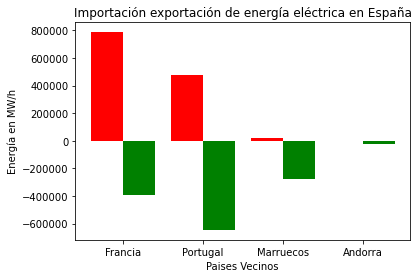

In [139]:
plt.figure(figsize = (10, 10))

fig, ax = plt.subplots()

etiquetas = df_Paises.columns[0:4]

valores1 = df_Paises[df_Paises["Importación o Exportación"]=="I"]["Francia"].mean()
valores2 = df_Paises[df_Paises["Importación o Exportación"]=="E"]["Francia"].mean()

valores3 = df_Paises[df_Paises["Importación o Exportación"]=="I"]["Portugal"].mean()
valores4 = df_Paises[df_Paises["Importación o Exportación"]=="E"]["Portugal"].mean()

valores5 = df_Paises[df_Paises["Importación o Exportación"]=="I"]["Marruecos"].mean()
valores6 = df_Paises[df_Paises["Importación o Exportación"]=="E"]["Marruecos"].mean()

valores7 = df_Paises[df_Paises["Importación o Exportación"]=="I"]["Andorra"].mean()
valores8 = df_Paises[df_Paises["Importación o Exportación"]=="E"]["Andorra"].mean()

x = np.arange(len(etiquetas))  
width = 0.4

plt.bar(x[0] - width/2, valores1, width, color = "red")
plt.bar(x[0] + width/2, valores2, width, color = "green")

plt.bar(x[1] - width/2, valores3, width, color = "red")
plt.bar(x[1] + width/2, valores4, width, color = "green")

plt.bar(x[2] - width/2, valores5, width, color = "red")
plt.bar(x[2] + width/2, valores6, width, color = "green")

plt.bar(x[3] - width/2, valores7, width, color = "red")
plt.bar(x[3] + width/2, valores8, width, color = "green")

ax.set_xticks(x)
ax.set_xticklabels(etiquetas)

plt.title("Importación exportación de energía eléctrica en España")

plt.xlabel("Paises Vecinos")

plt.ylabel("Energía en MW/h")

plt.show()